In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py
import sys
import yaml

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../')

In [4]:
import datatools

In [5]:
from glob import glob

In [6]:
files_loc = "/gpfs/slac/atlas/fs1/d/rafaeltl/public/Muon/simulation/20220628/atlas_mm_vmm_bkgr_1_TRAIN/"

In [7]:
target_card='../../cards/atlas_mm_vmm.yml'

In [8]:
all_files = glob(files_loc+'*.h5')

In [9]:
data, dmat, Y, Y_mu, Y_hit, sig_keys = datatools.make_data_matrix(all_files, max_files=500, sort_by='z')

~~ Reading data... ~~


100%|██████████| 200/200 [00:27<00:00,  7.38it/s]


~~ Calculating occupancy information... ~~


100%|██████████| 199999/199999 [00:06<00:00, 30790.80it/s]

!!
I read 199999 events, of which 100000 have muon and 99999 do not
!!


In [10]:
Xout = datatools.detector_matrix(dmat, sig_keys, target_card)

~~ Preparing detector-based data matrix ~~
Using detector card: ../../cards/atlas_mm_vmm.yml


100%|██████████| 199999/199999 [00:08<00:00, 22837.29it/s]


Output data matrix shape: (199999, 12, 19)


In [11]:
Xout[:,4,sig_keys.index('z')]

array([-0.49202733, -0.49202733, -0.49202733, ..., -0.49202733,
       -0.49202733, -0.49202733])

In [18]:
sig_keys.index('z')

3

PLANE 0


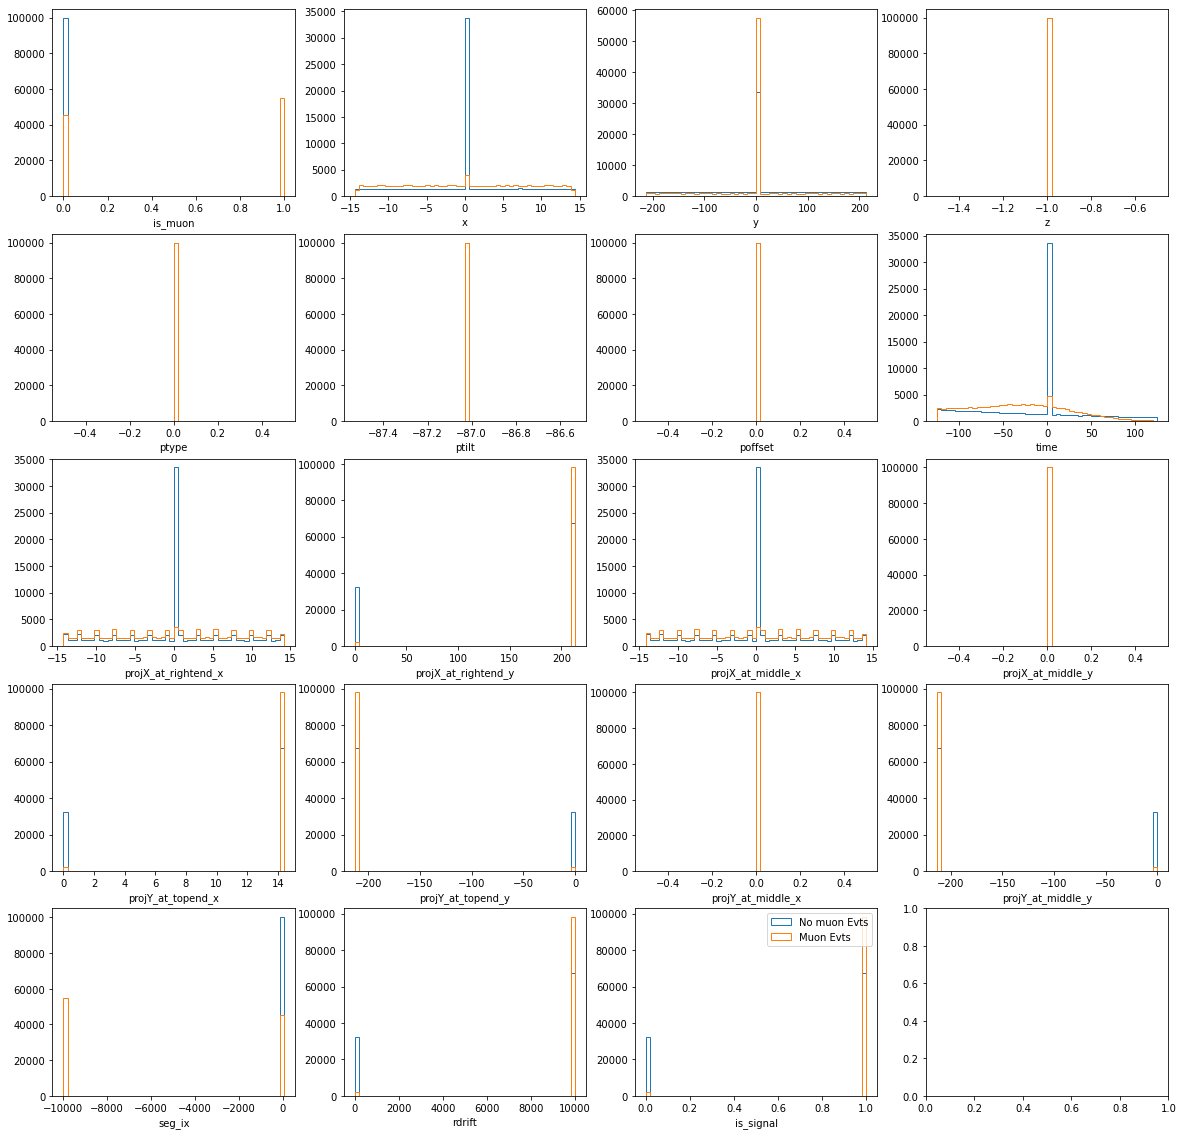


PLANE 1


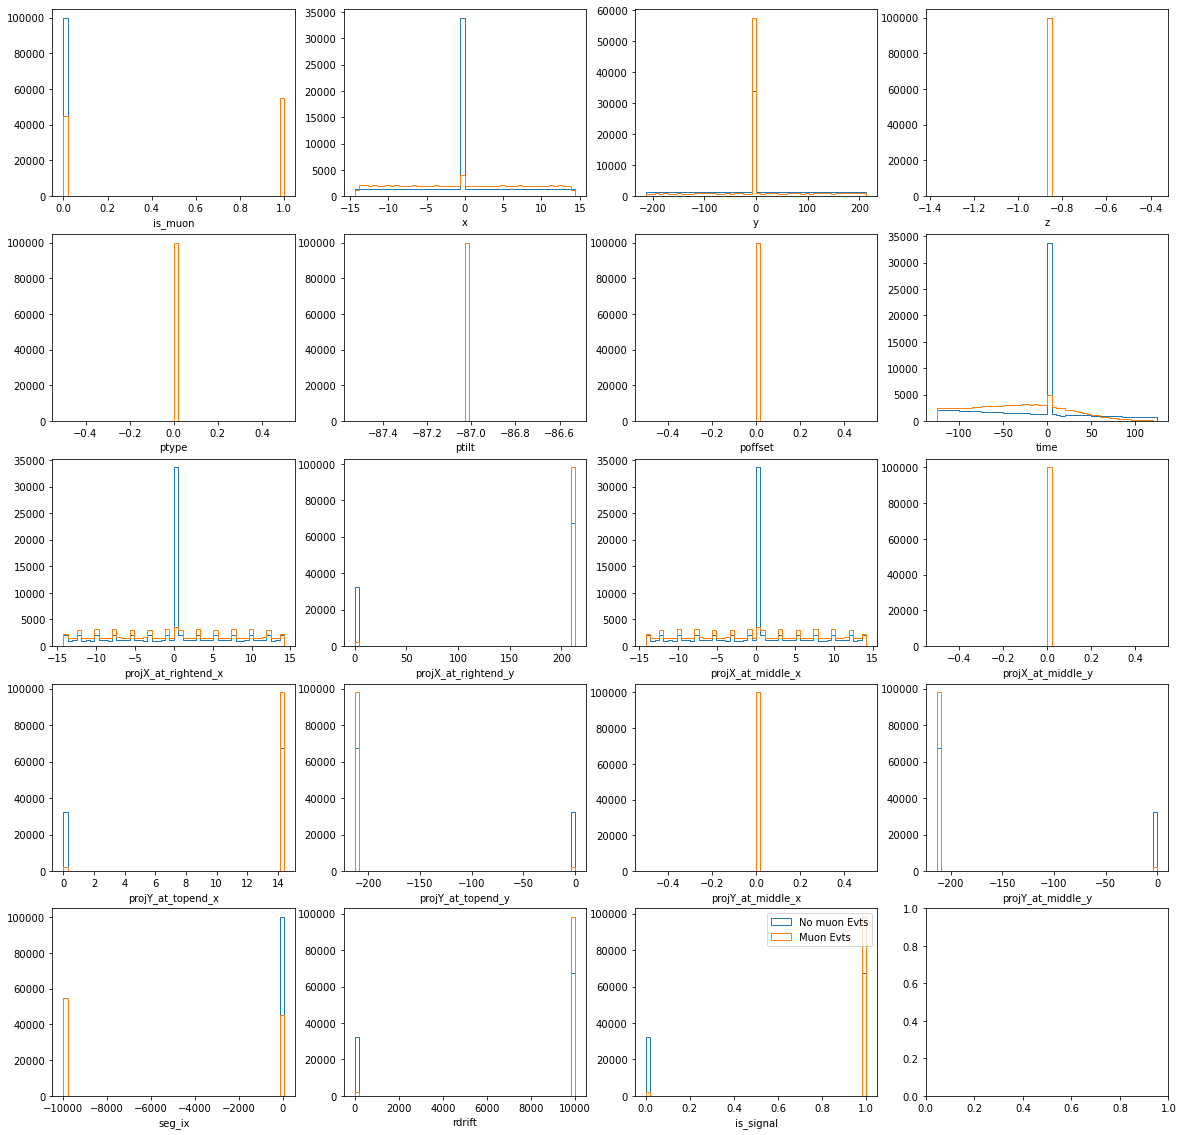


PLANE 2


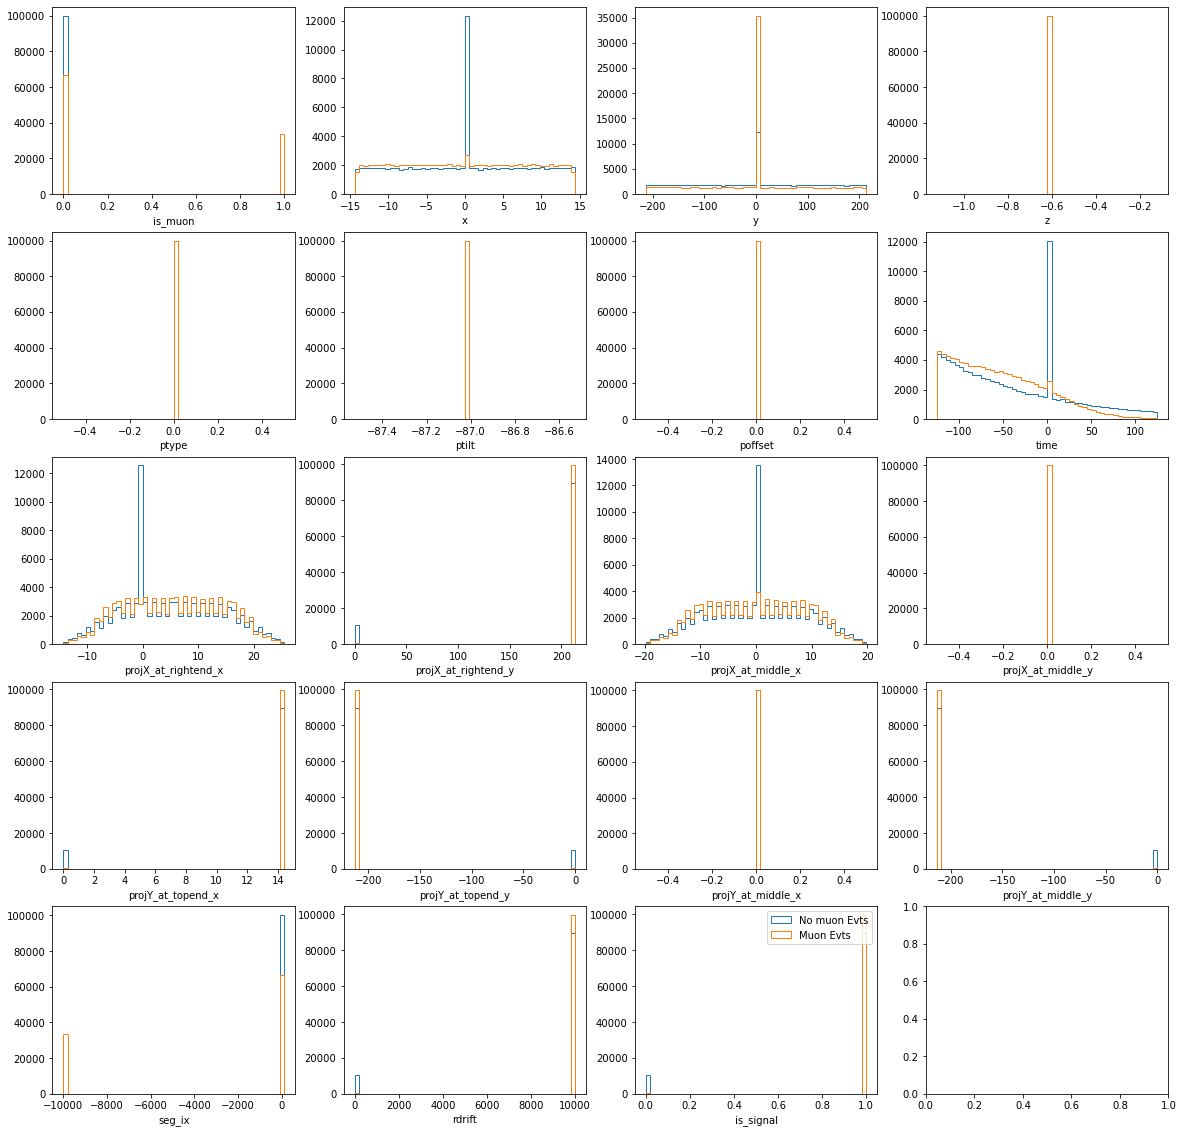


PLANE 3


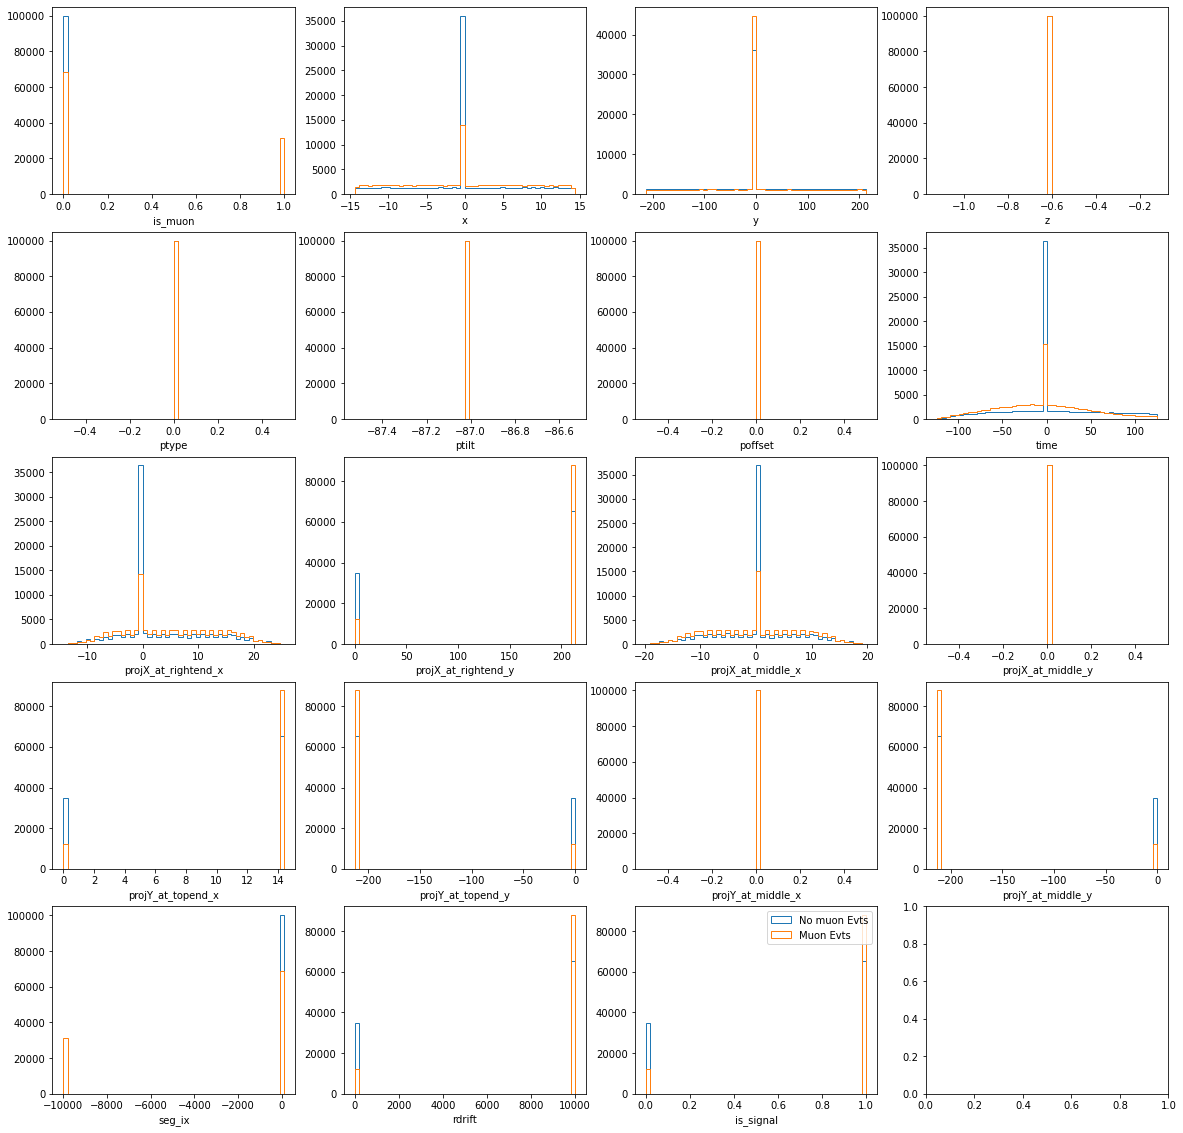


PLANE 4


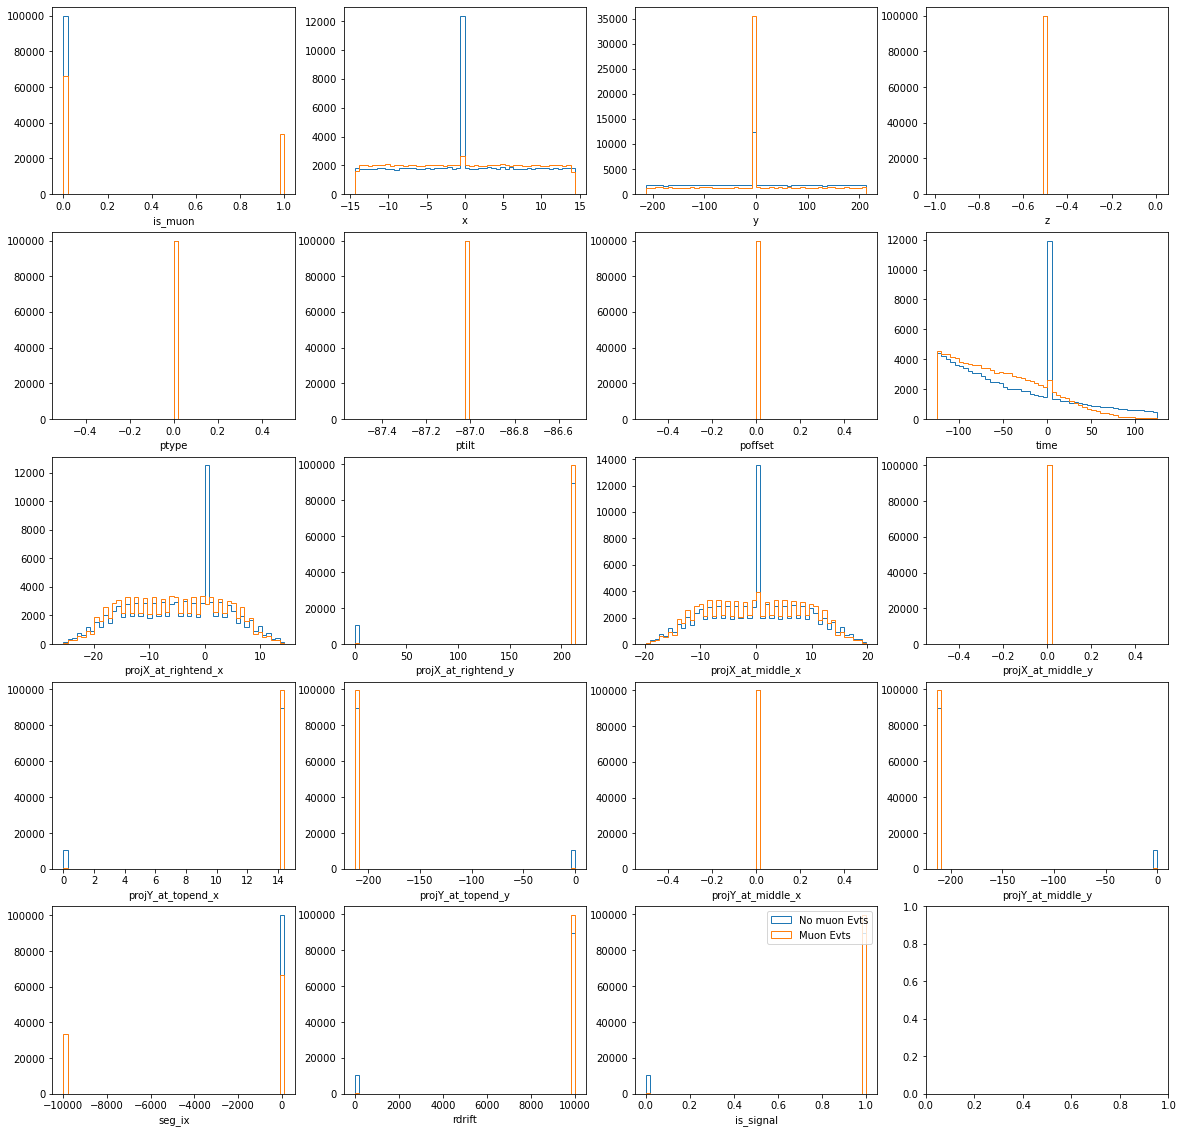


PLANE 5


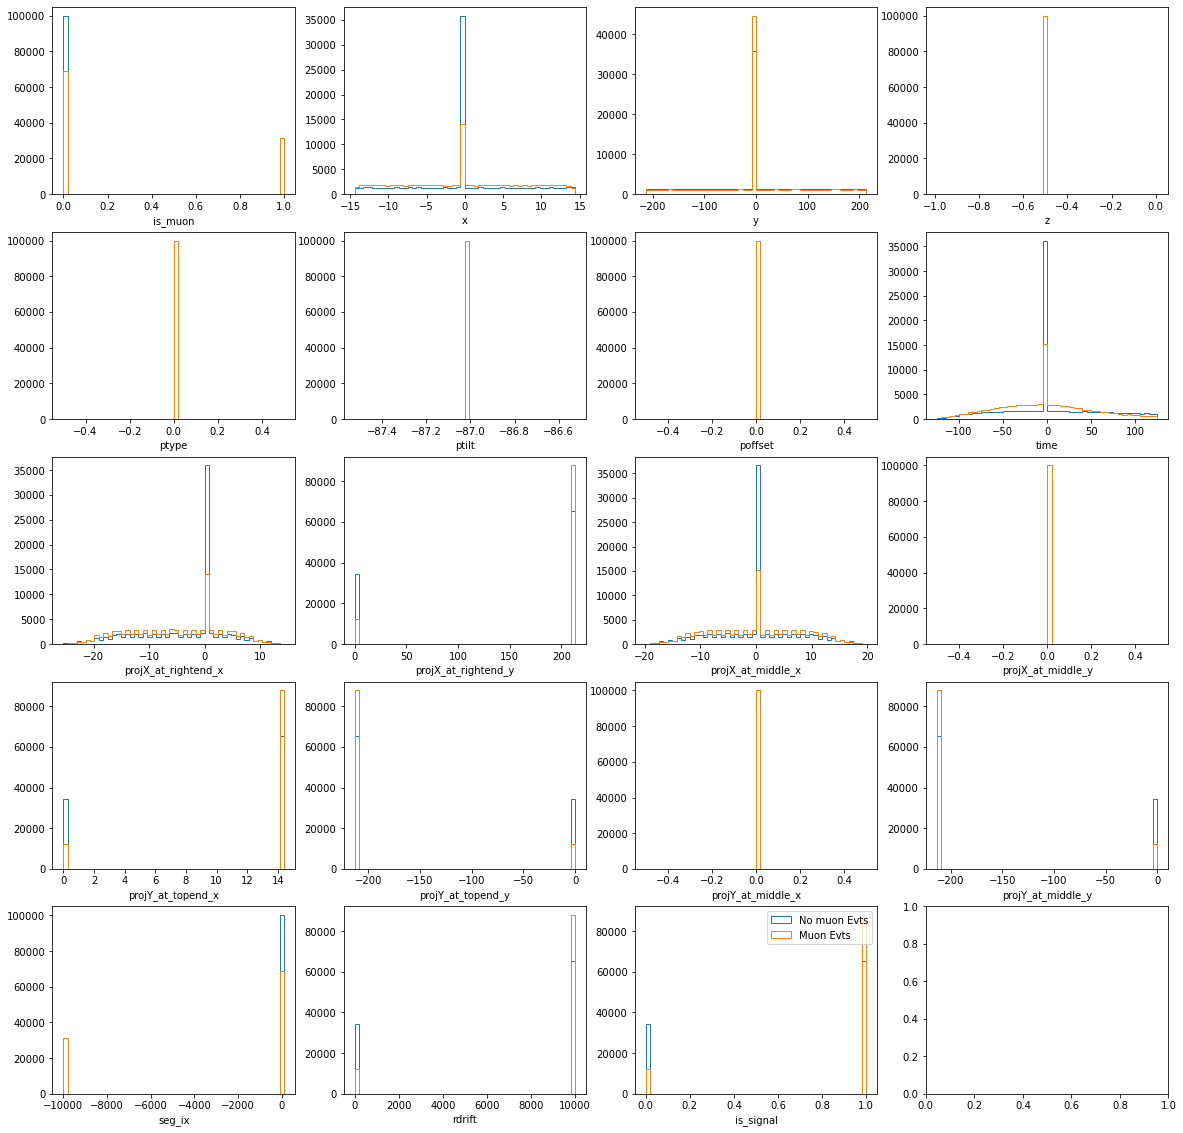


PLANE 6


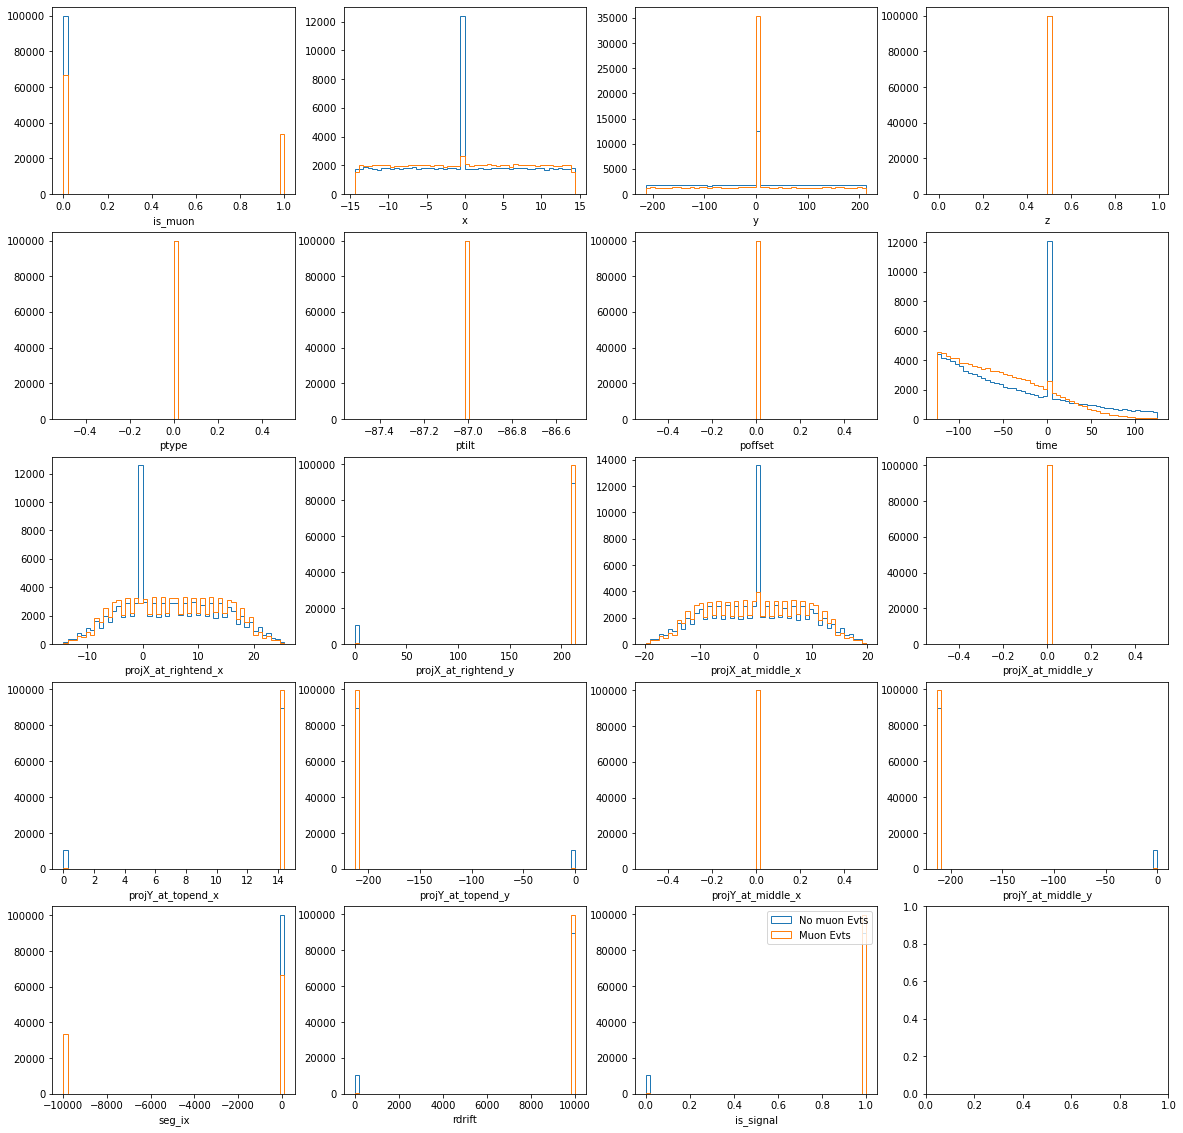


PLANE 7


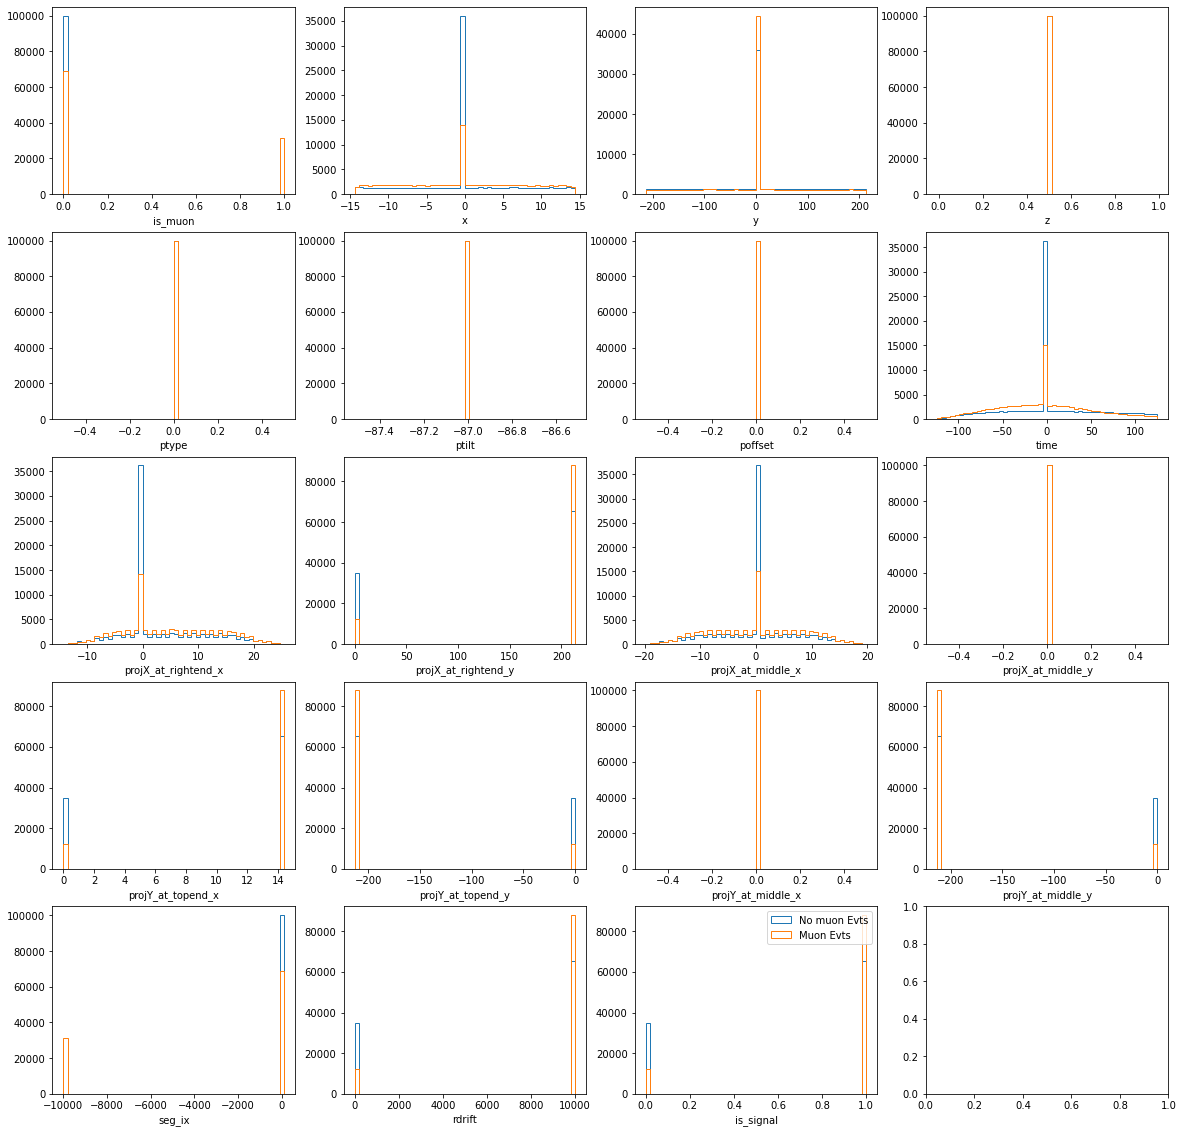


PLANE 8


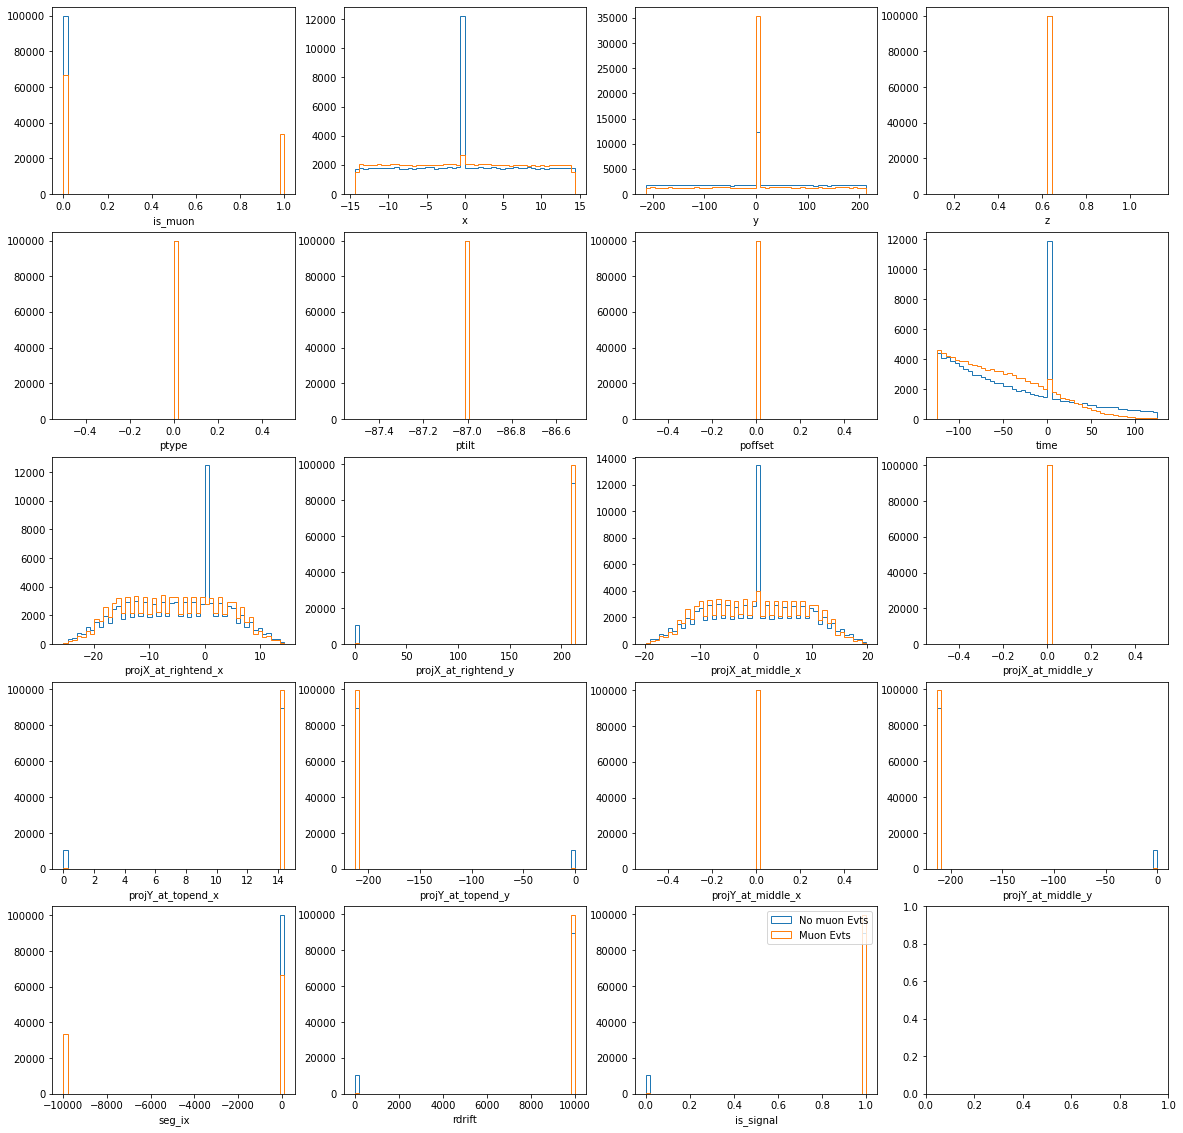


PLANE 9


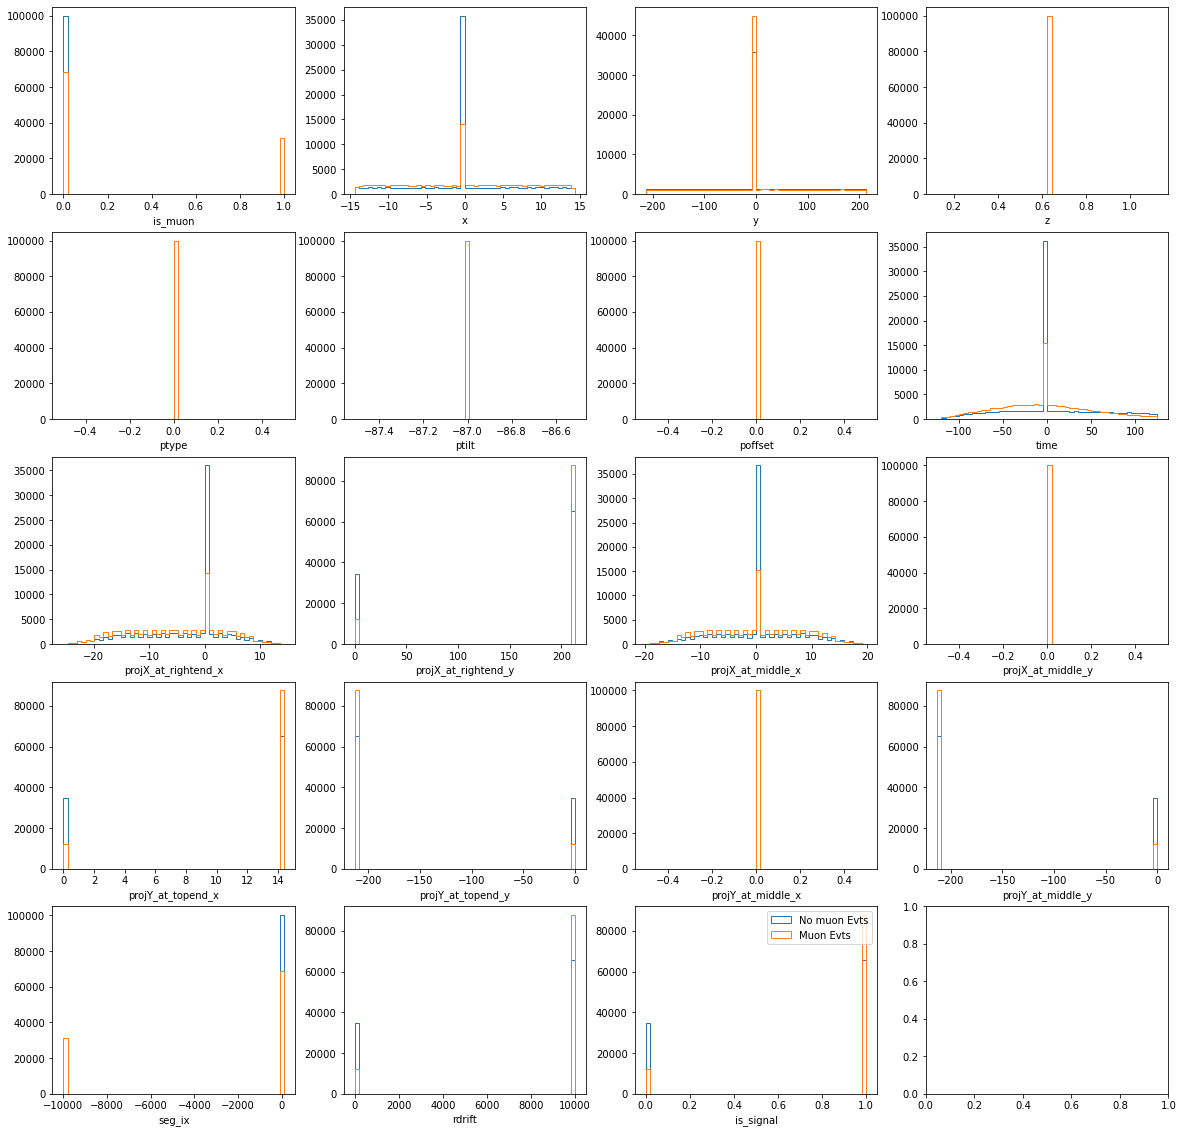


PLANE 10


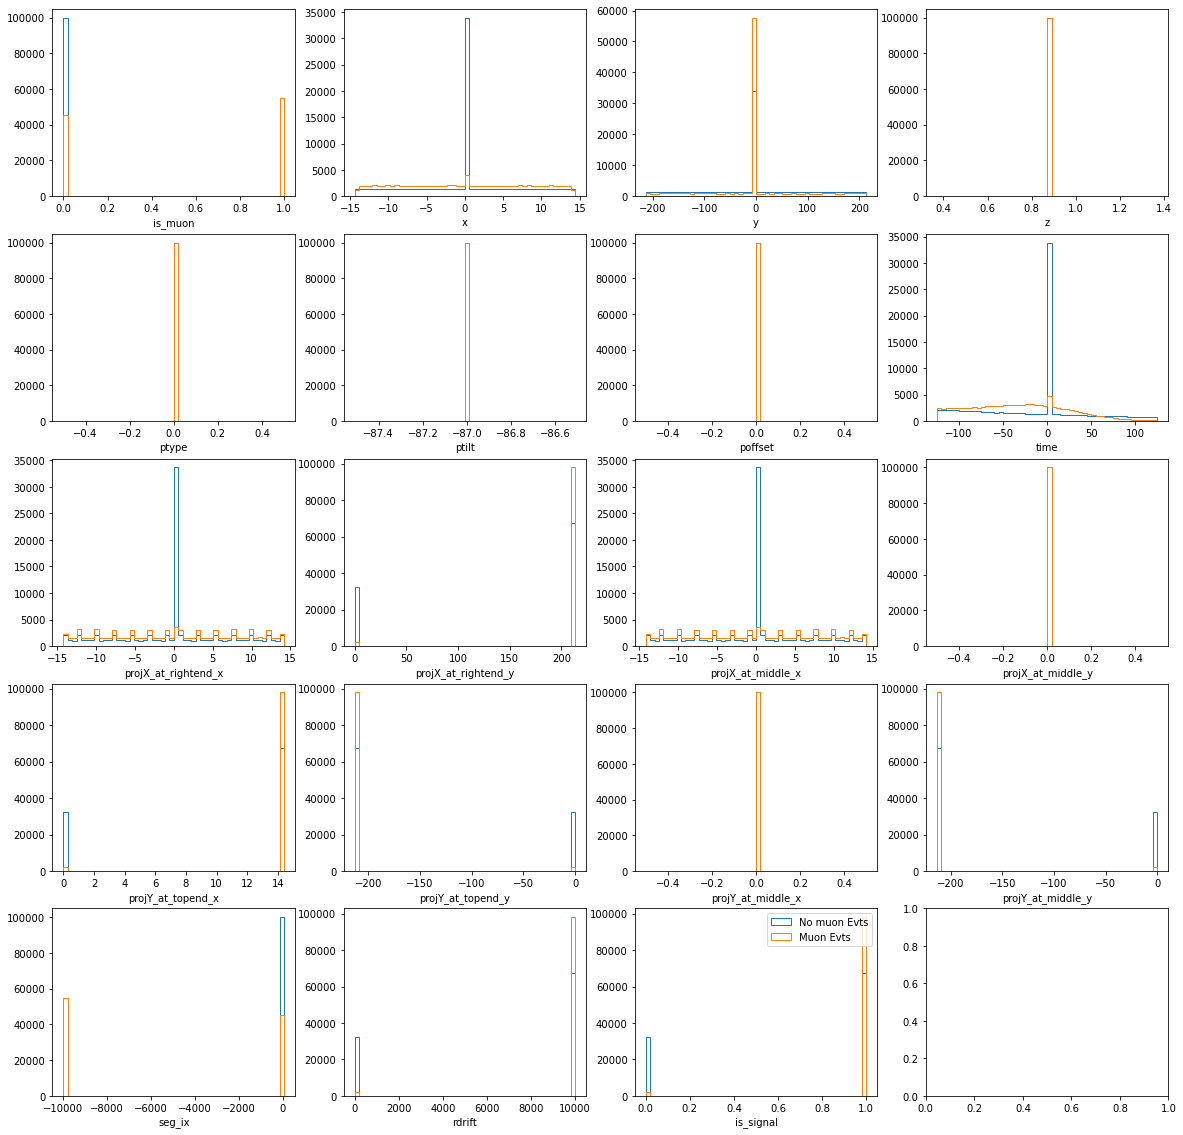


PLANE 11


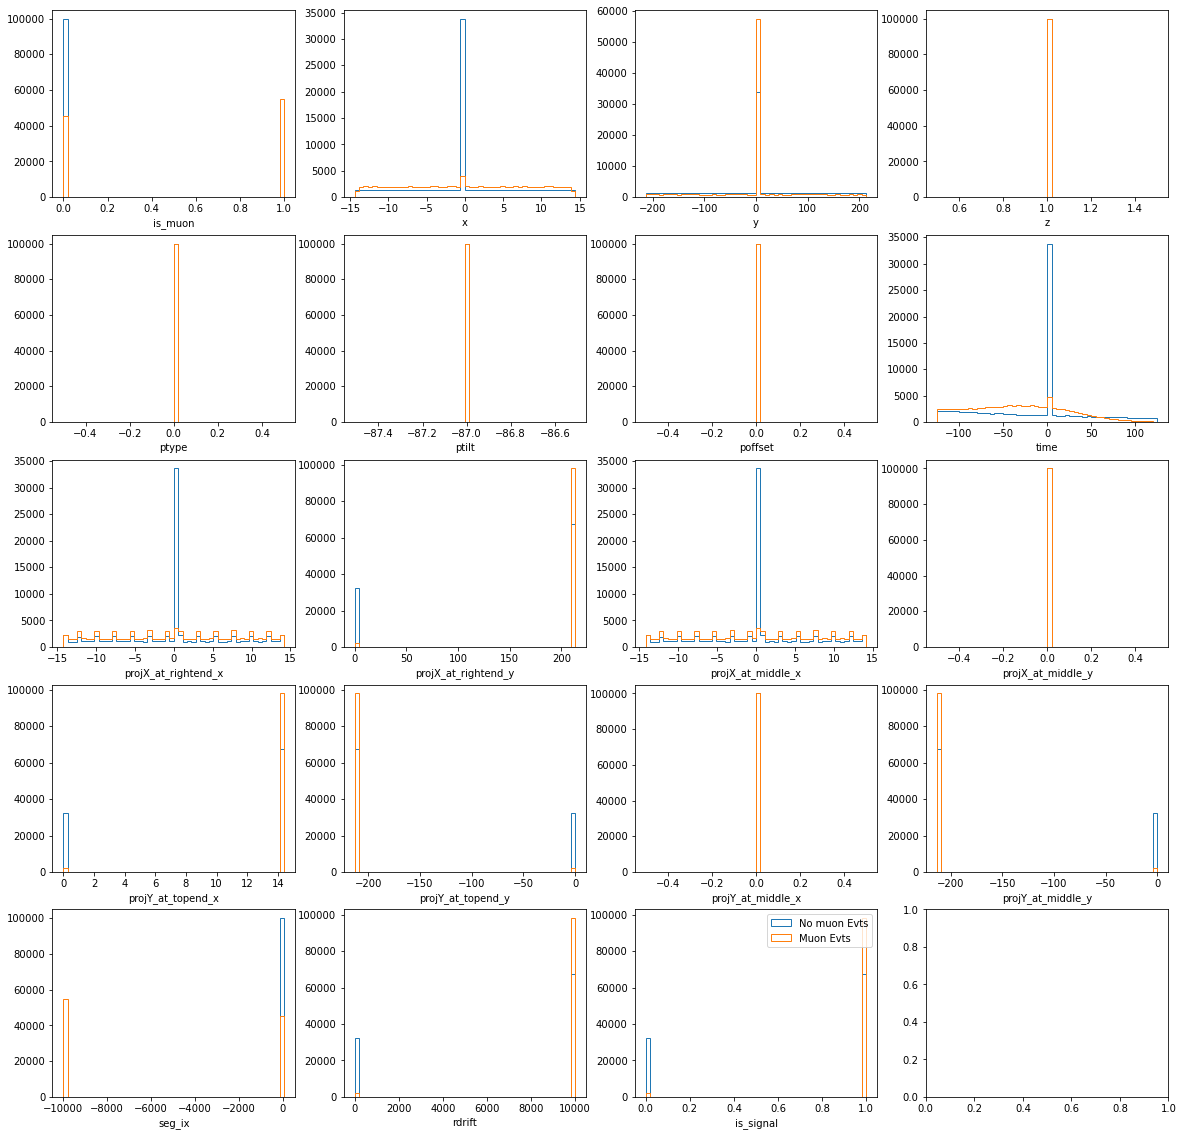

In [12]:
for ip in range(Xout.shape[1]):
    print(f"PLANE {ip}")
    
    ncols=4
    nrows=5
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
    axs = axs.flatten()

    for ivar in range(Xout.shape[2]):

        this_var_mu   = Xout[Y_mu == 1,ip,ivar].flatten()
        this_var_nomu = Xout[Y_mu == 0,ip,ivar].flatten()

        this_max = np.max([*this_var_mu, *this_var_nomu])
        this_min = np.min([*this_var_mu, *this_var_nomu])

        axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
        axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

        axs[ivar].set_xlabel(sig_keys[ivar])

        if ivar == Xout.shape[2] - 1:
            axs[ivar].legend()

    plt.show()
    print()

In [13]:
Xout.shape

(199999, 12, 19)

In [15]:
Xsq = np.reshape(Xout, (Xout.shape[0], Xout.shape[1]*Xout.shape[2]))

In [16]:
Xsq.shape

(199999, 228)

In [25]:
Xsq[:,3+19*4]

array([-0.49202733, -0.49202733, -0.49202733, ..., -0.49202733,
       -0.49202733, -0.49202733])

PLANE 0


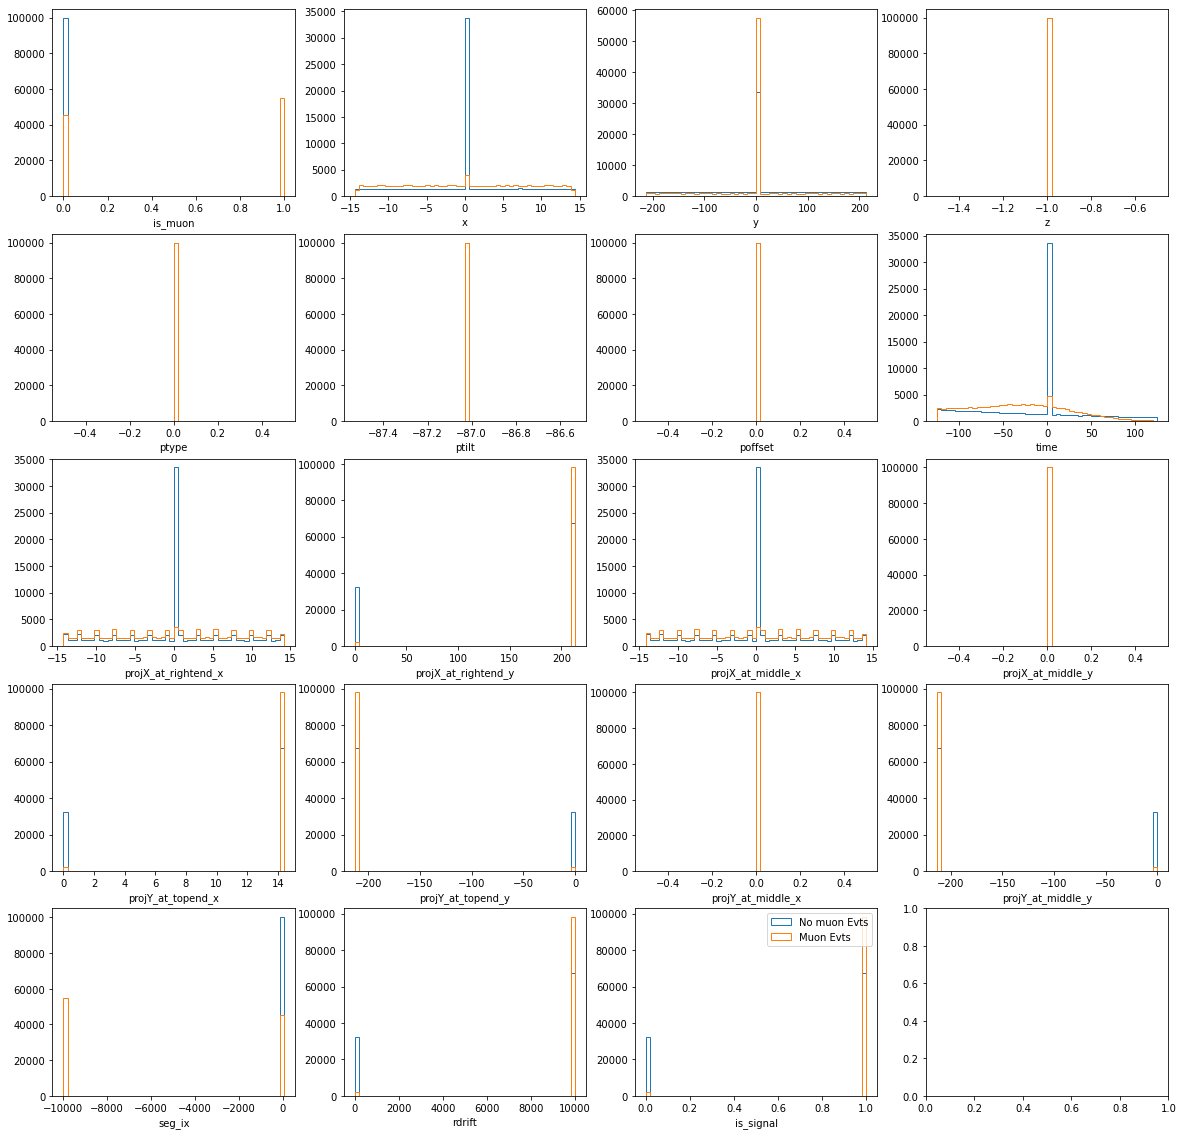


PLANE 1


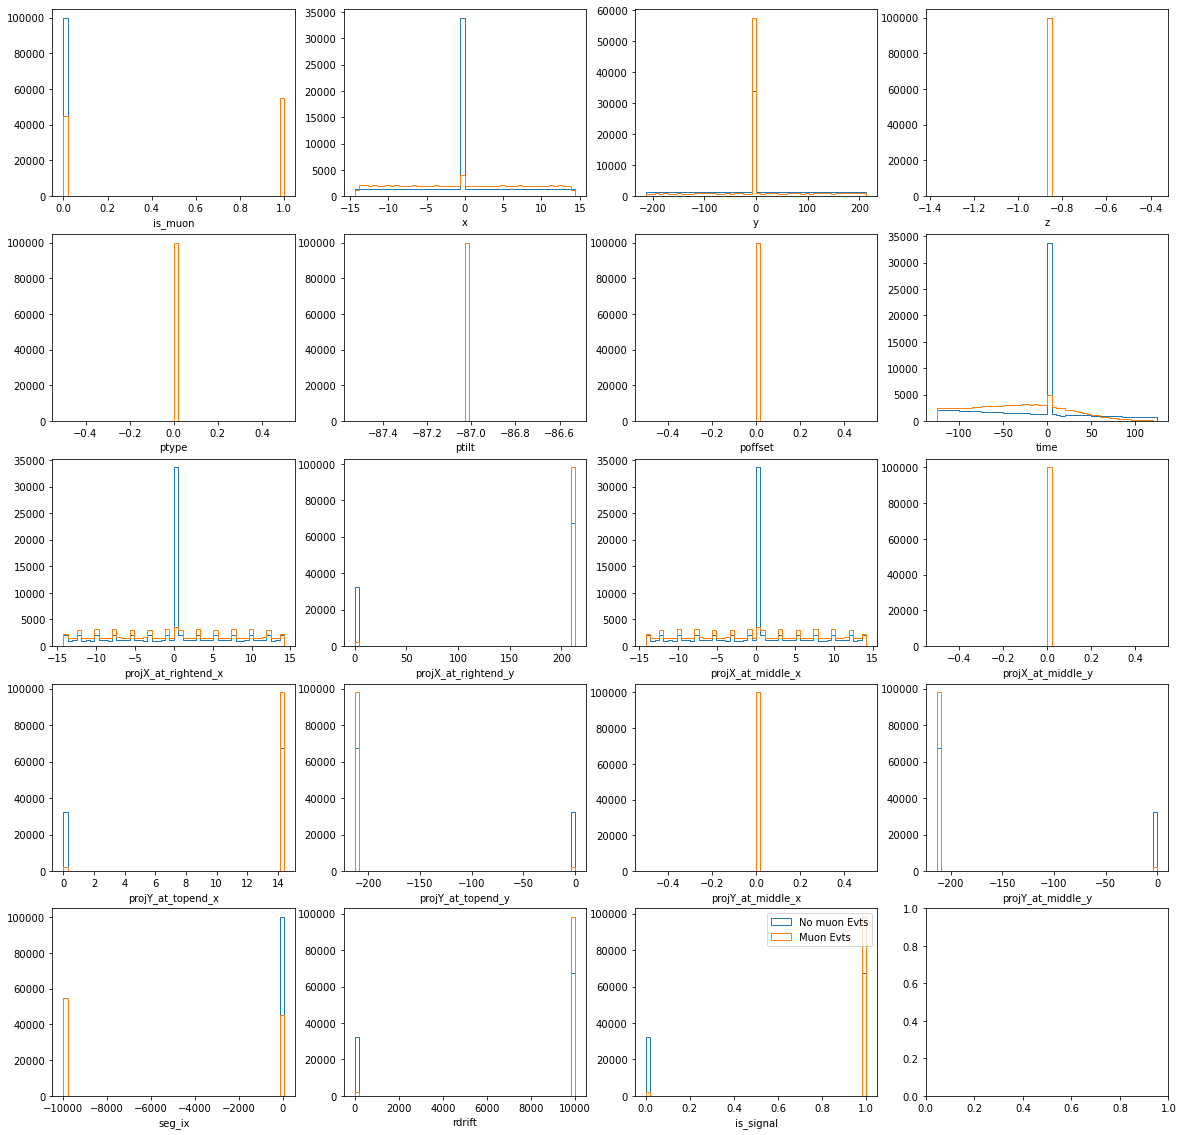


PLANE 2


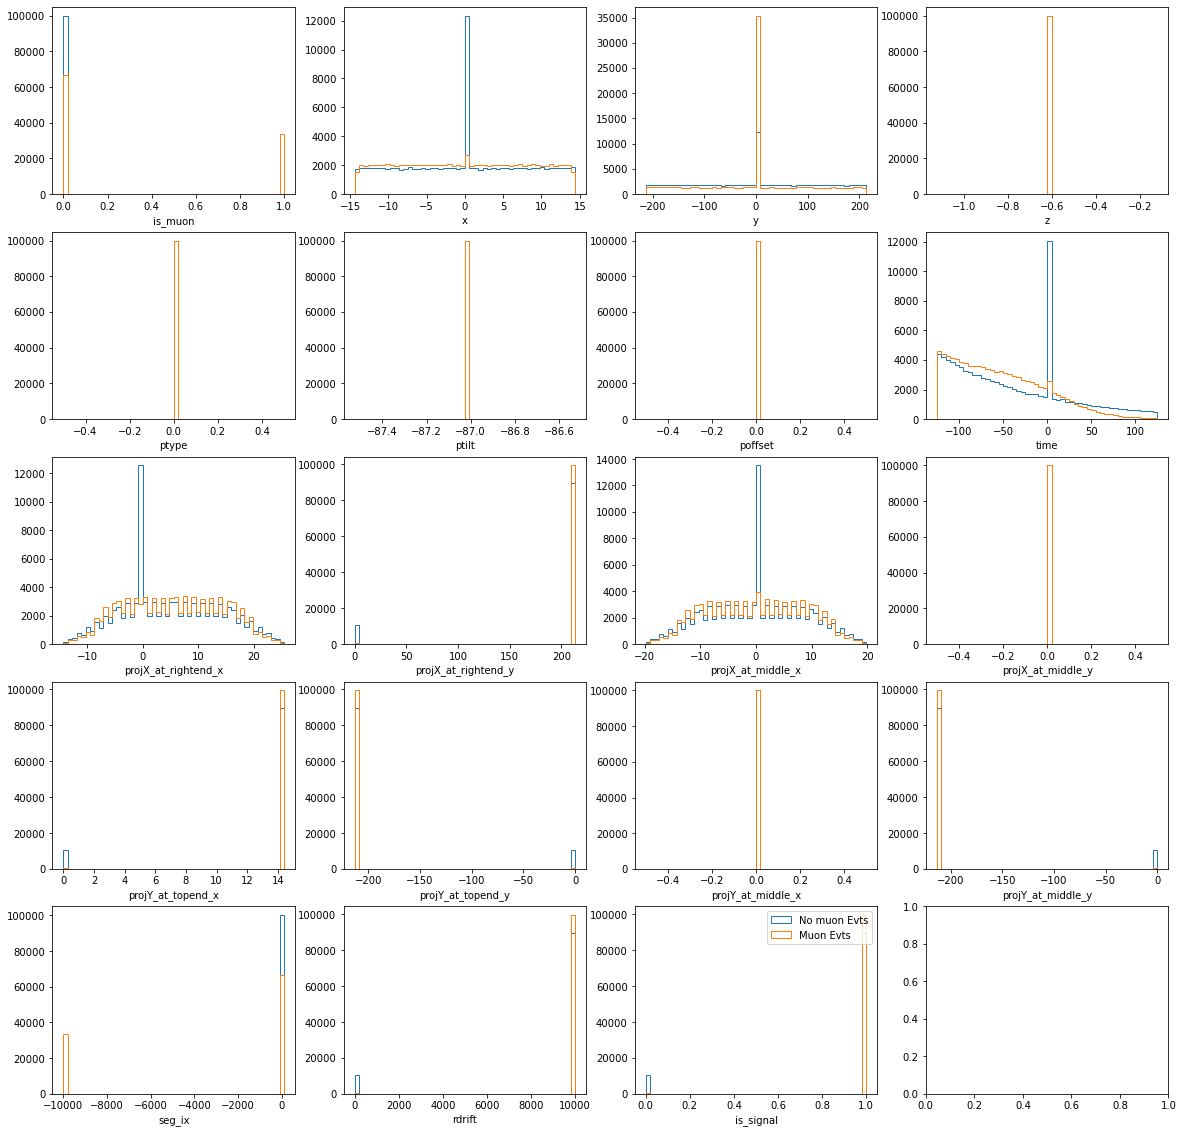


PLANE 3


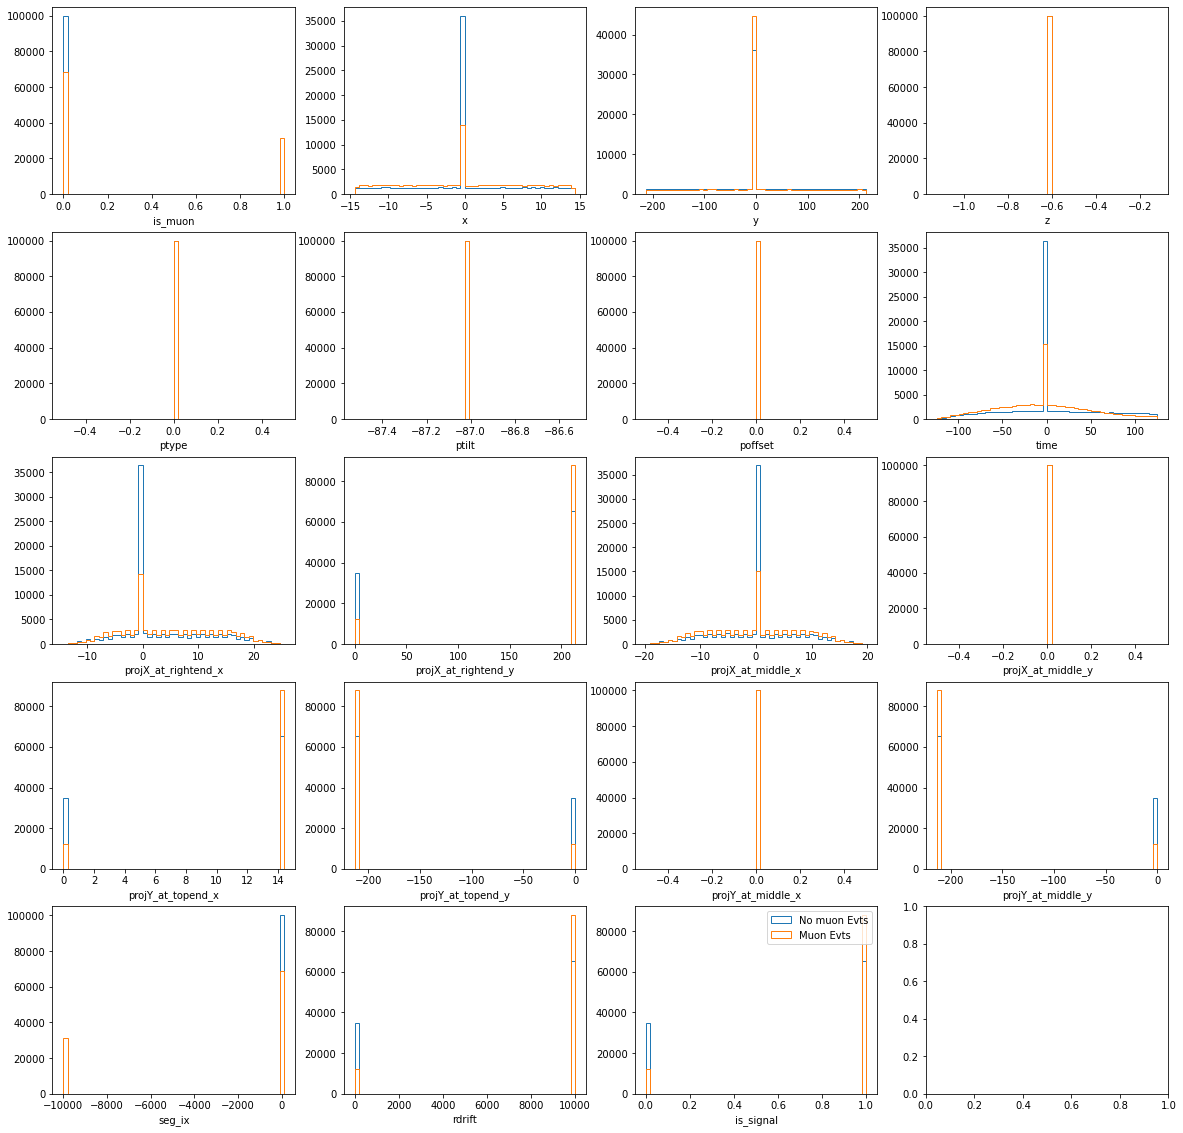


PLANE 4


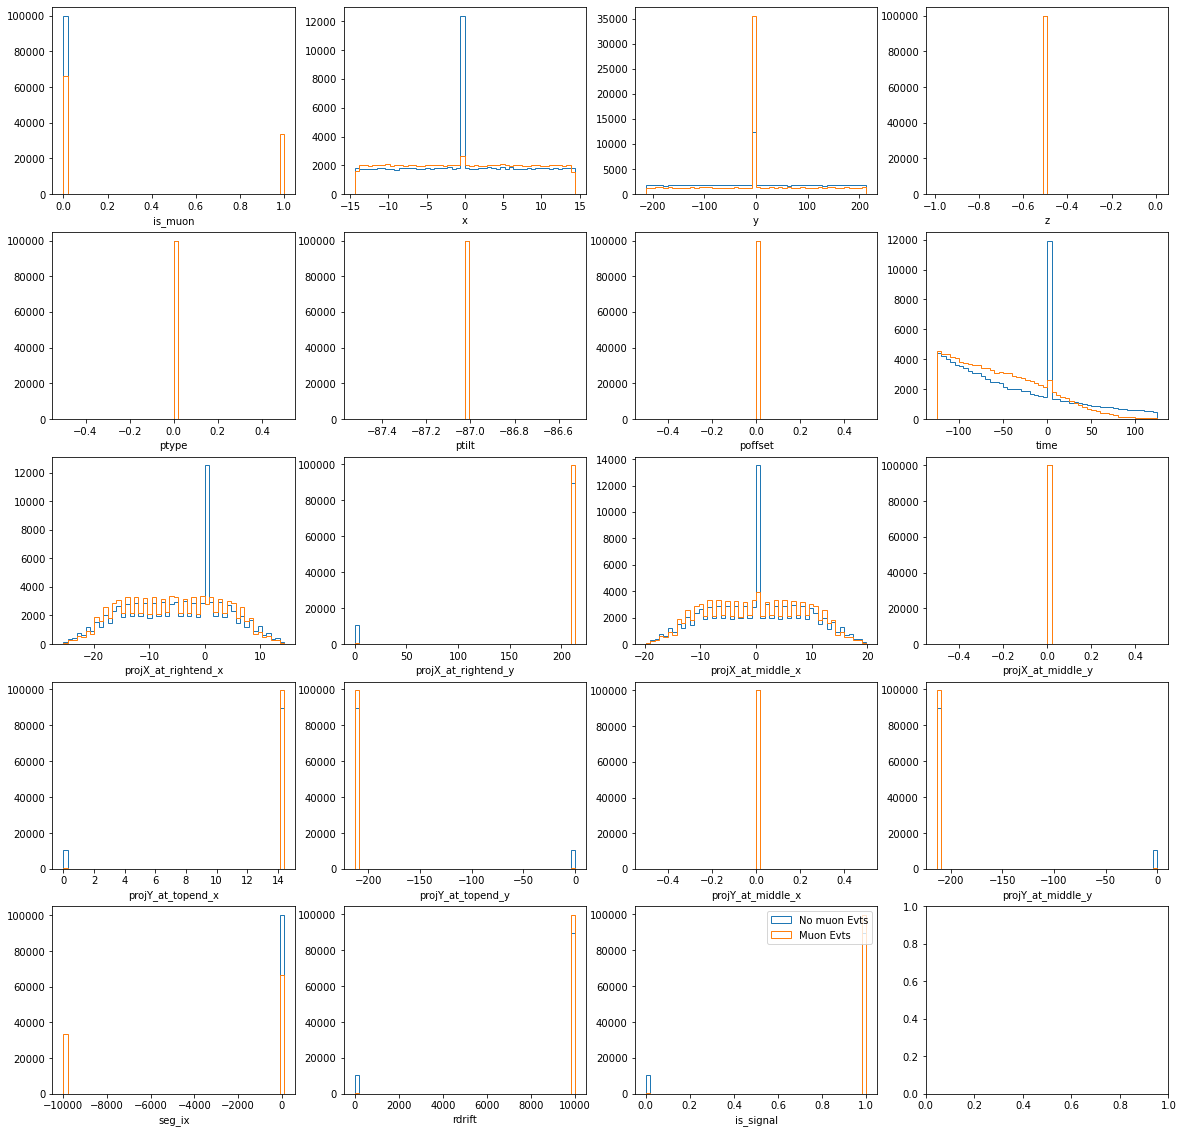


PLANE 5


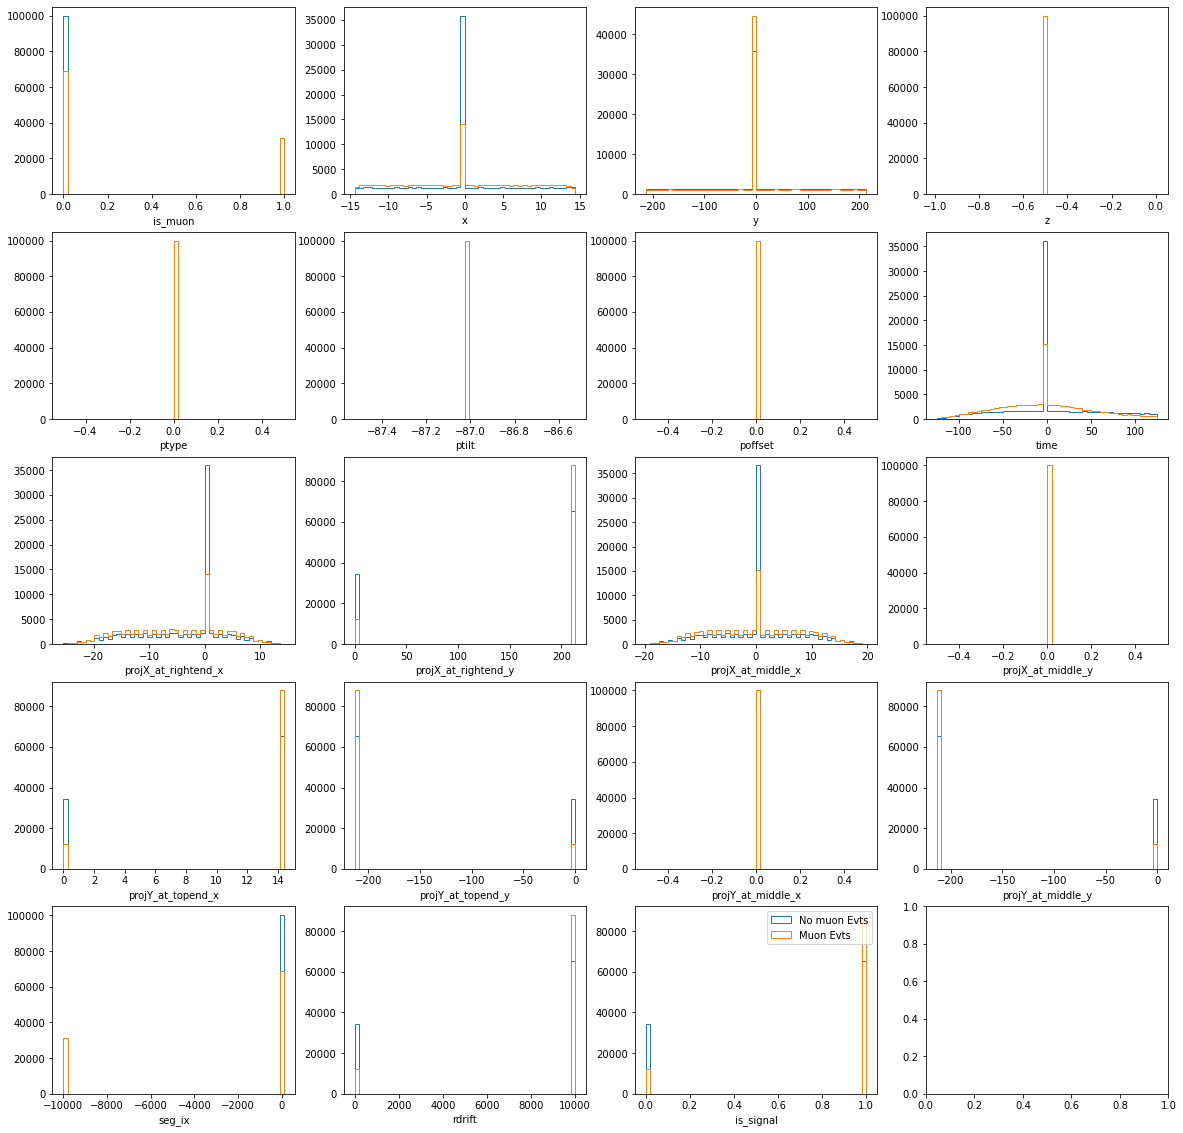


PLANE 6


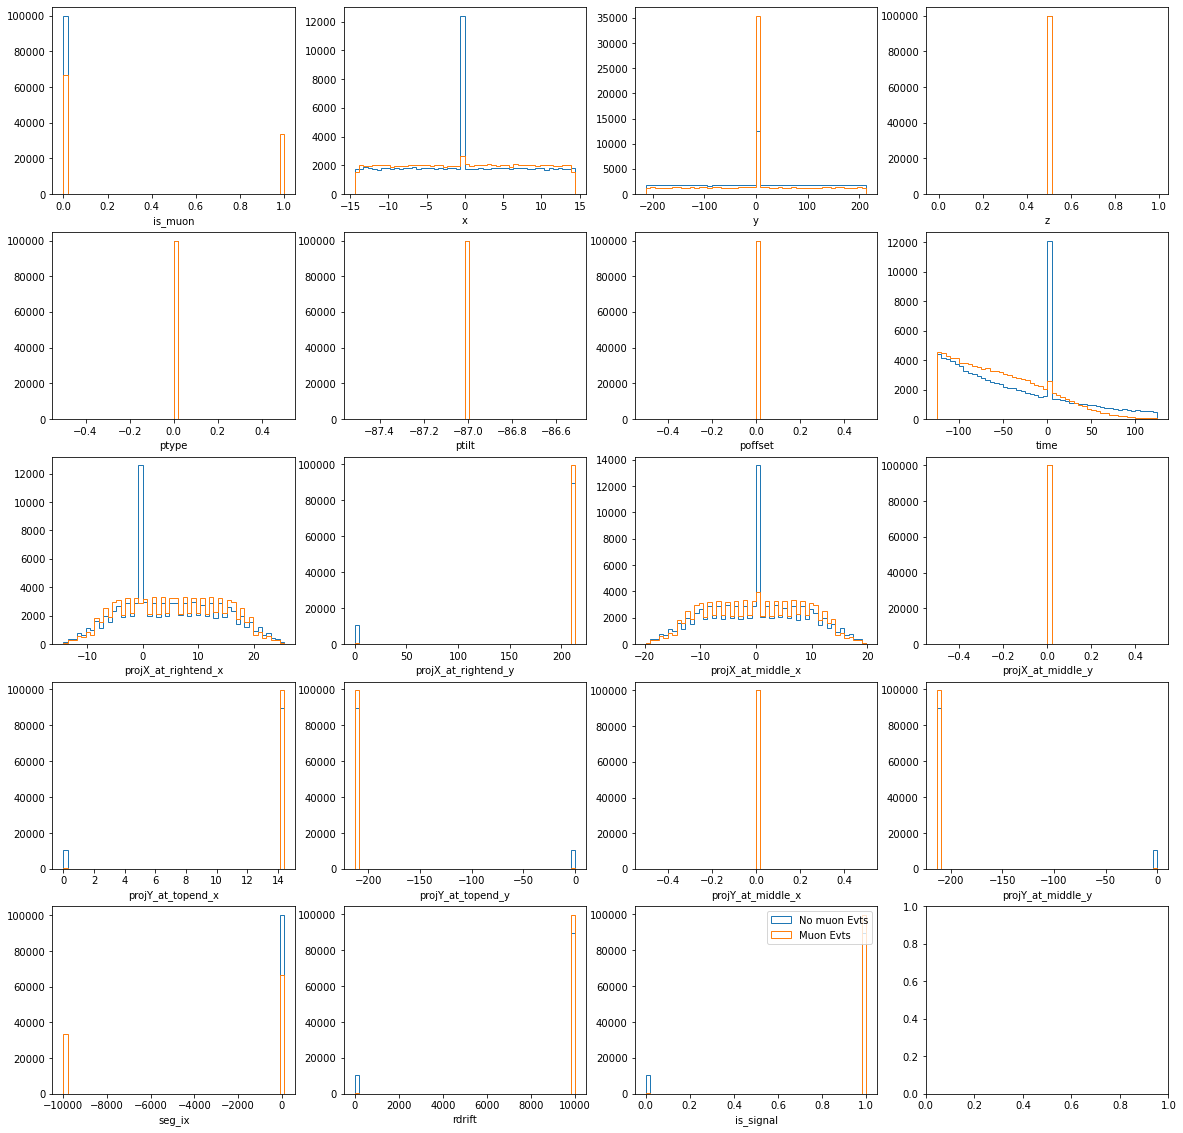


PLANE 7


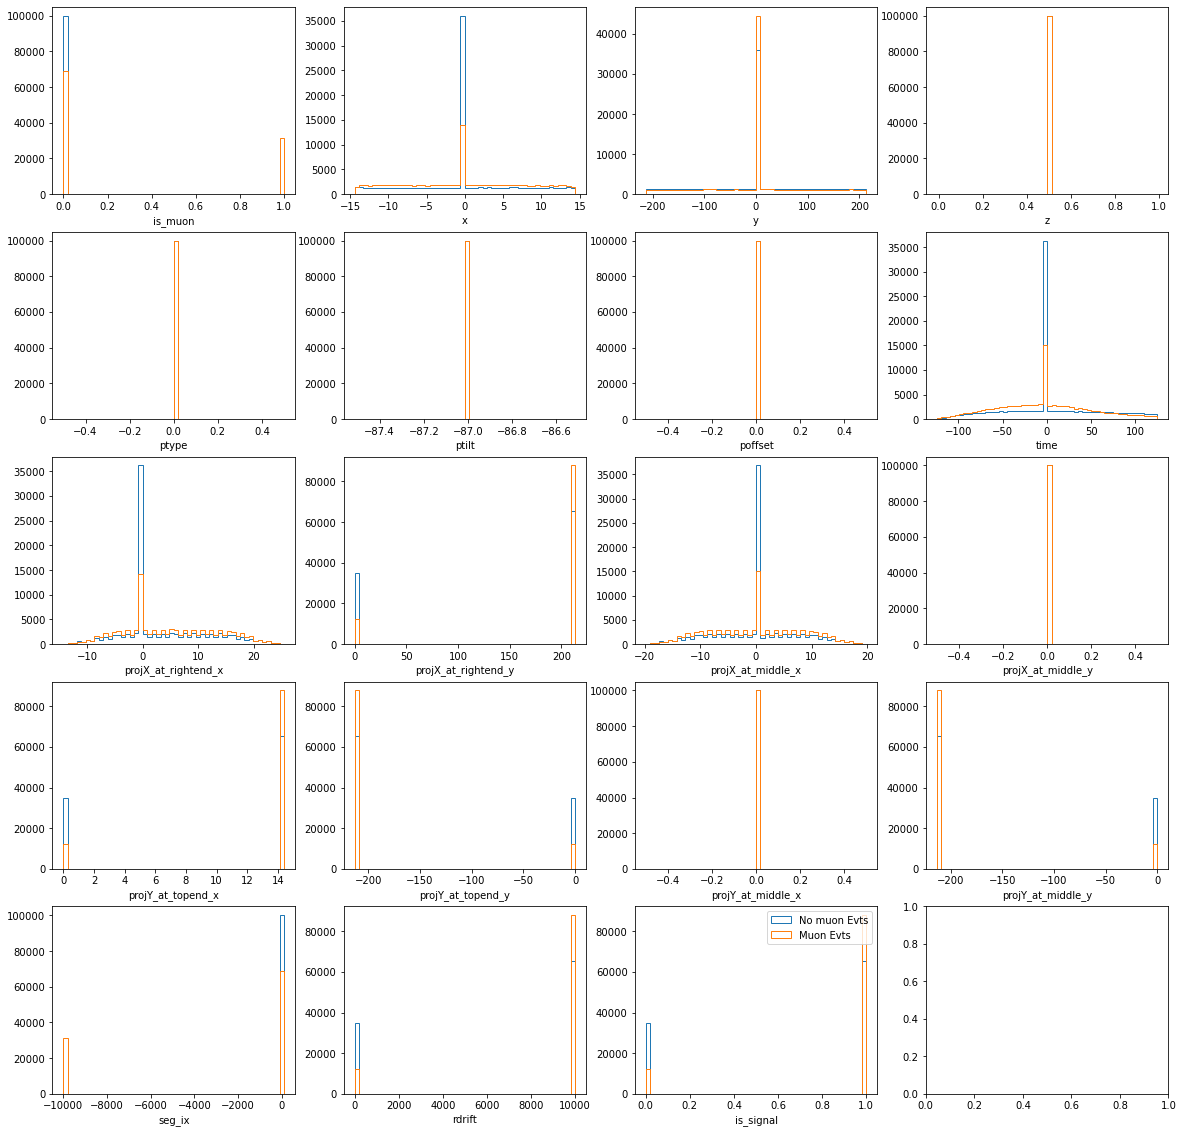


PLANE 8


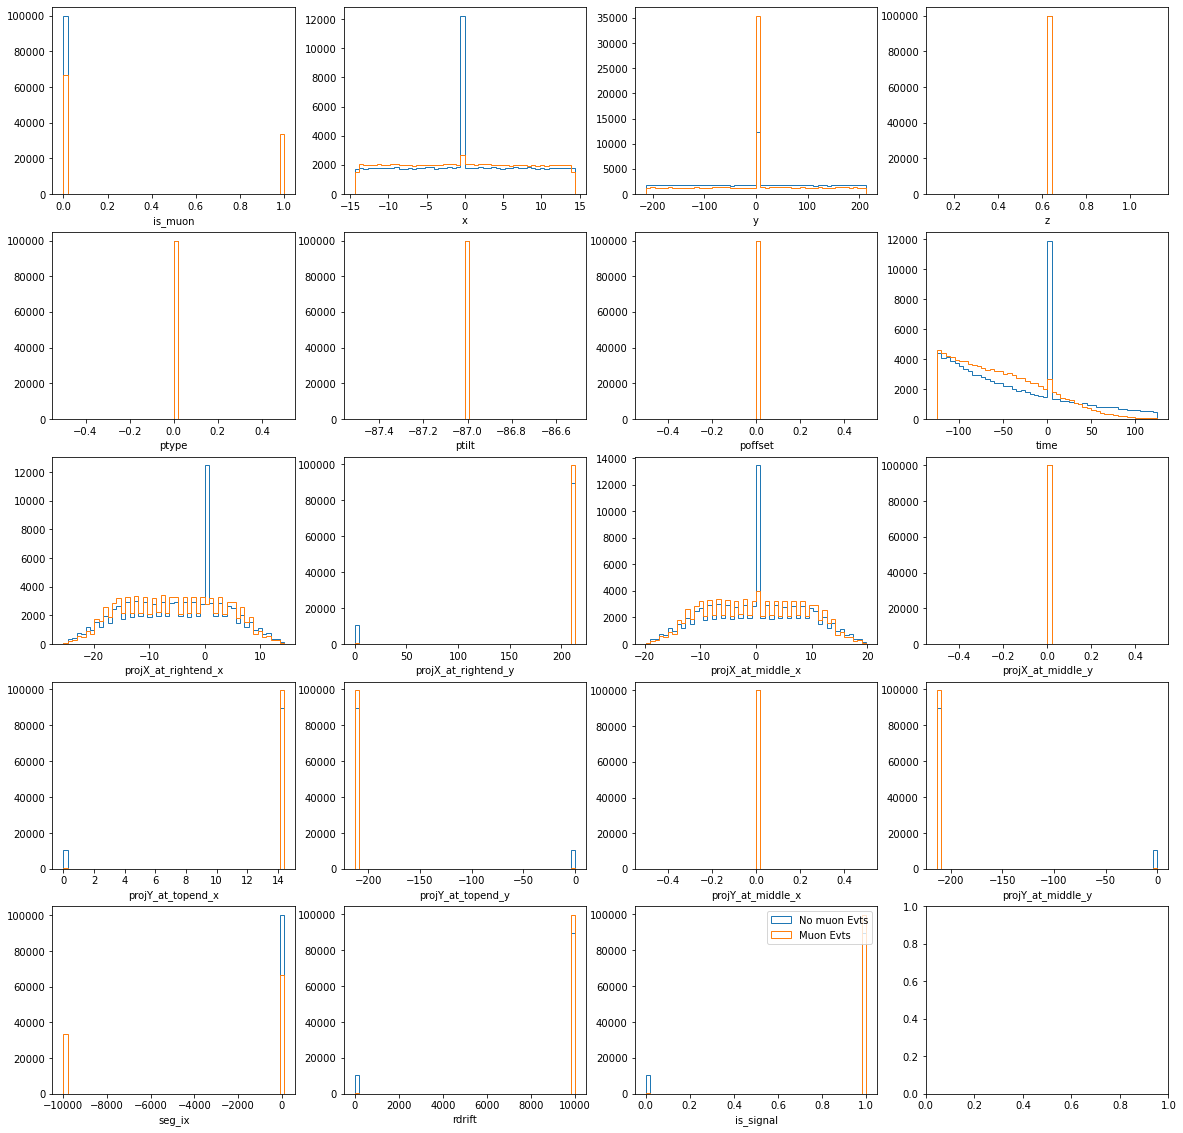


PLANE 9


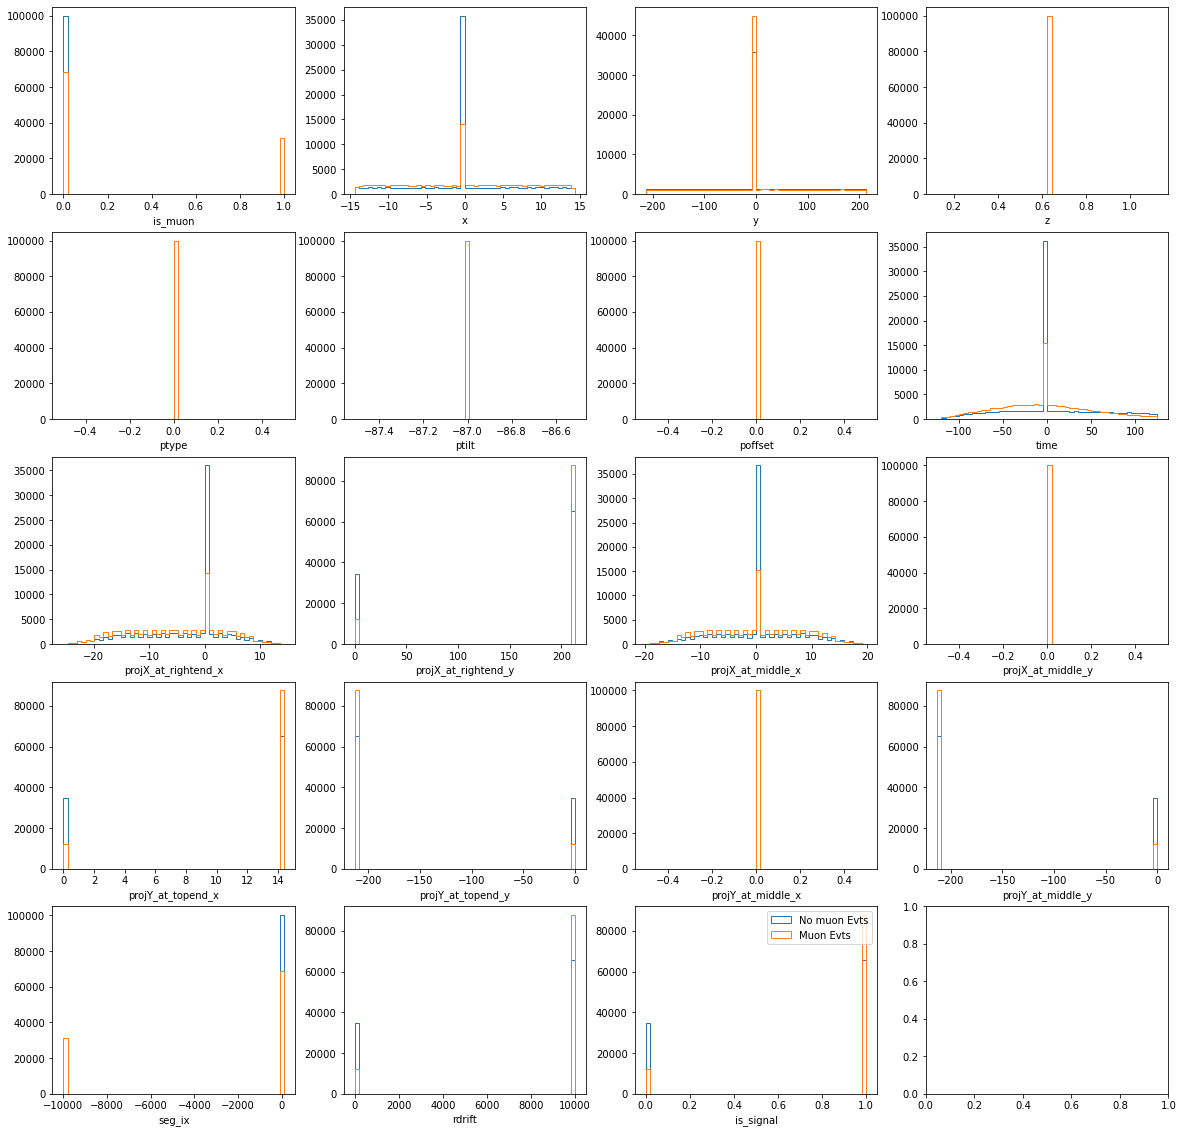


PLANE 10


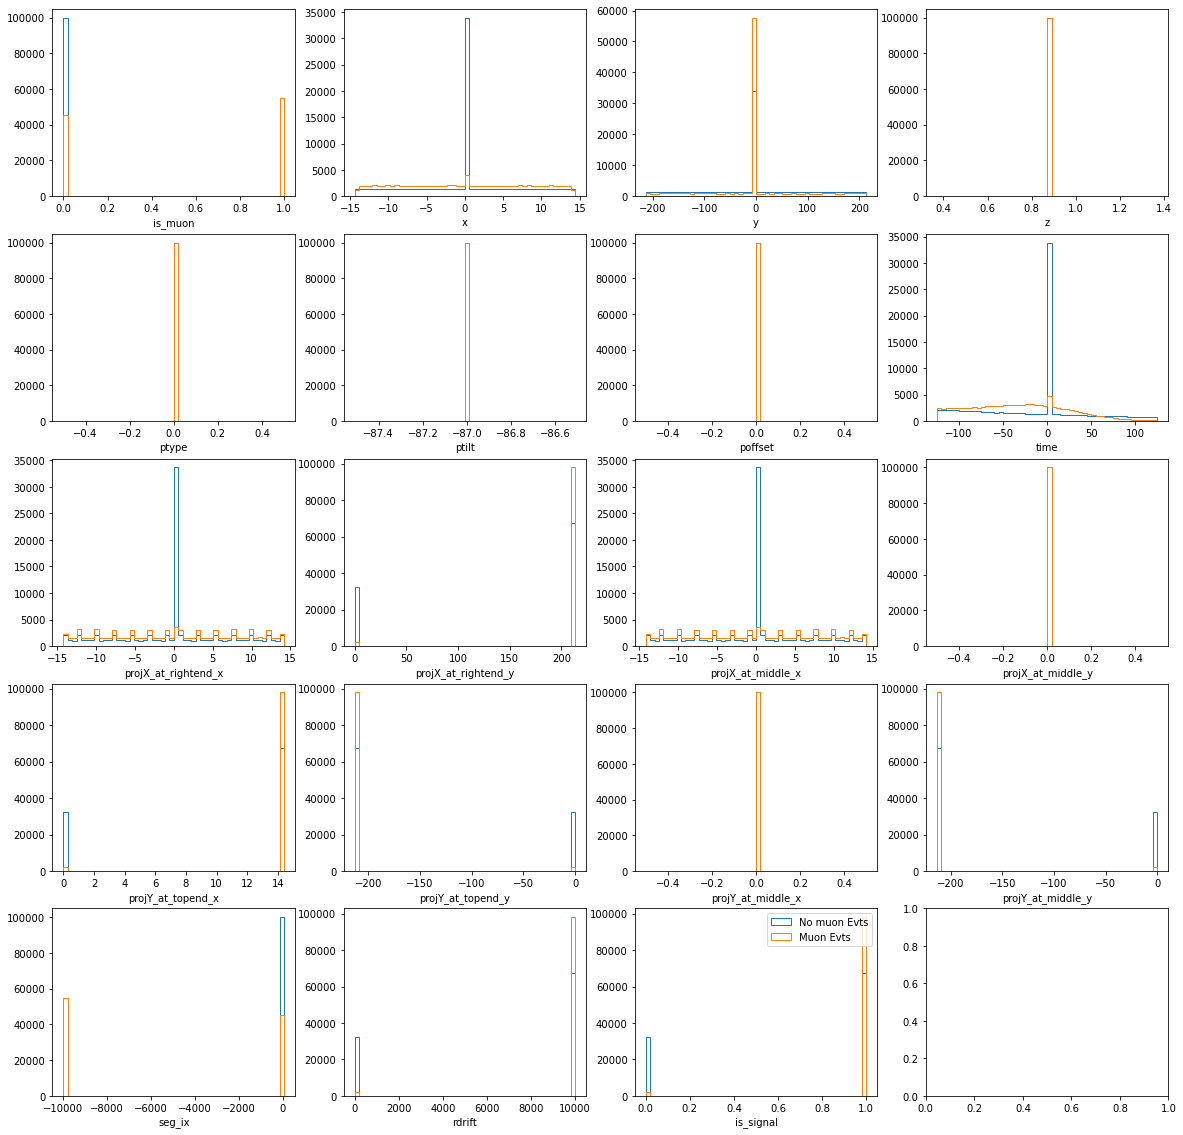


PLANE 11


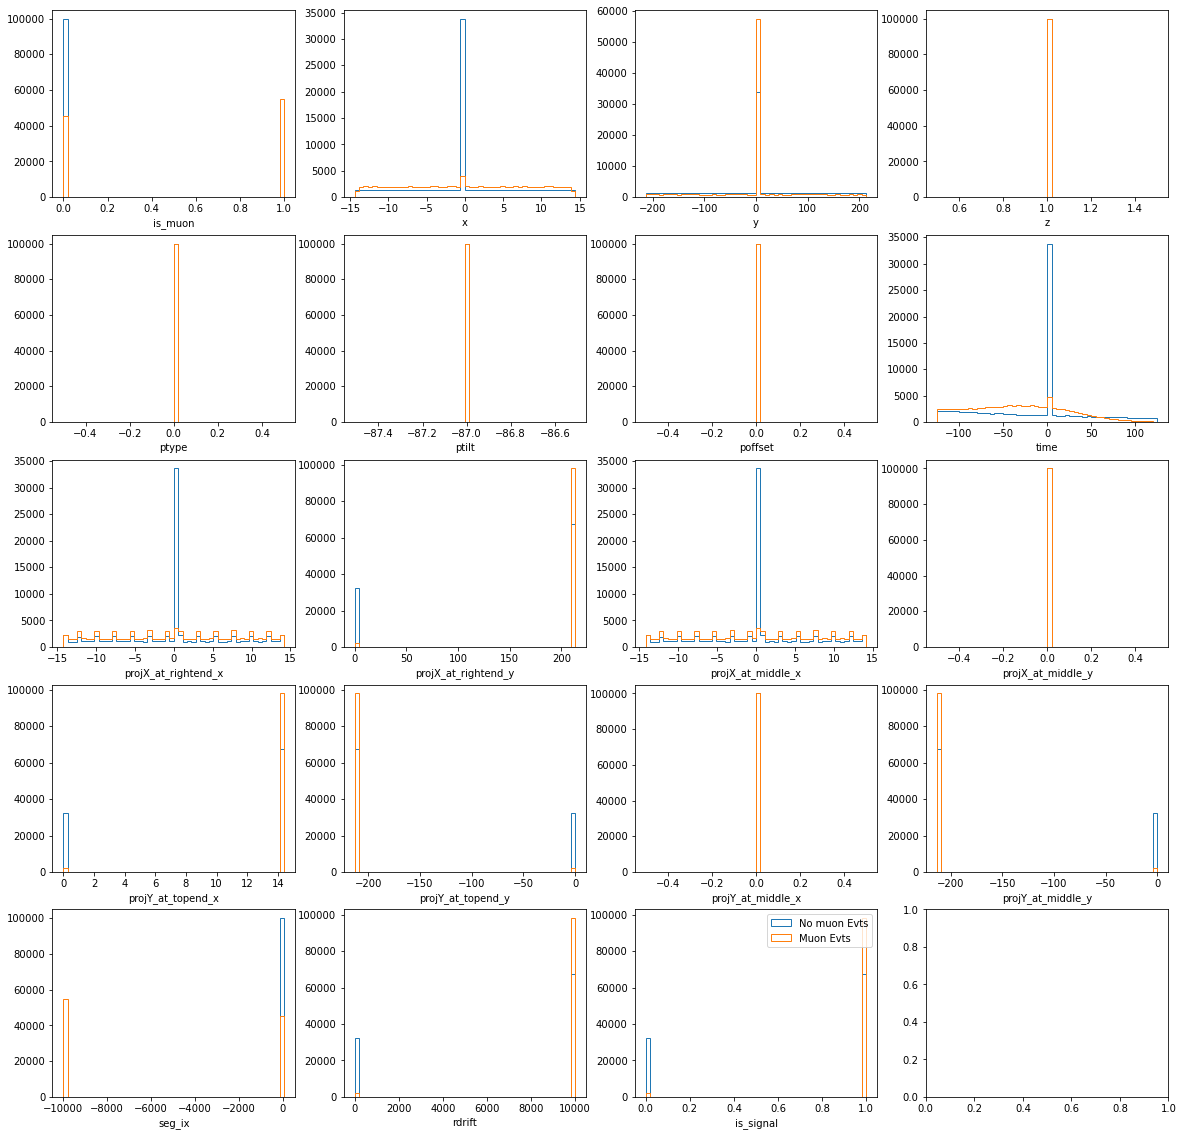

In [26]:
for ip in range(Xout.shape[1]):
    print(f"PLANE {ip}")
    
    ncols=4
    nrows=5
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
    axs = axs.flatten()

    for ivar in range(Xout.shape[2]):

        this_var_mu   = Xsq[Y_mu == 1,ivar + Xout.shape[2]*ip].flatten()
        this_var_nomu = Xsq[Y_mu == 0,ivar + Xout.shape[2]*ip].flatten()

        this_max = np.max([*this_var_mu, *this_var_nomu])
        this_min = np.min([*this_var_mu, *this_var_nomu])

        axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
        axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

        axs[ivar].set_xlabel(sig_keys[ivar])

        if ivar == Xout.shape[2] - 1:
            axs[ivar].legend()

    plt.show()
    print()